In [4]:

import matplotlib.pyplot as plt

In [315]:
from torch.autograd import Variable


## generate graph

In [346]:
from graspy.simulations import sbm
import networkx as nx
sizes = [5,5]
probs = [[0.3, 0.01], [0.01,0.3]]
G1 = sbm(sizes,probs)
G2 = nx.stochastic_block_model(sizes, probs)

In [347]:
for (i,j) in G2.edges:   #these are all the edges indexed with idices of nodes
    print((i,j))

(0, 1)
(0, 3)
(2, 4)
(3, 4)
(4, 8)
(5, 8)
(5, 9)


In [348]:
np.argwhere(G1>0)  #these are also the edges indexed with idices of nodes

array([[0, 3],
       [2, 4],
       [3, 0],
       [4, 2],
       [5, 6],
       [6, 5],
       [7, 8],
       [7, 9],
       [8, 7],
       [9, 7]])

In [350]:
G1 #G generated with graspy.simulations.sbm is essentially a weight matrix, 1 if connected, 0 if not connected

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [325]:
sizes = [10,10]
probs = [[0.5, 0.05], [0.05,0.5]]
g = nx.stochastic_block_model(sizes, probs, seed=0)

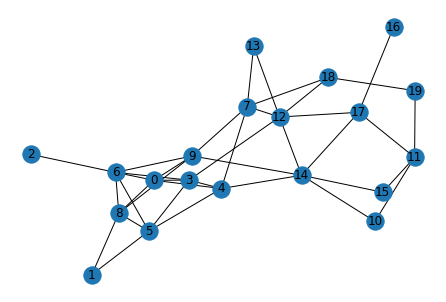

In [326]:
nx.draw(g,with_labels=True)

In [329]:
number_nodes=len(g)
number_nodes

20

In [332]:
E = len(g.edges)
E

38

In [322]:
cluster_sizes = [5,5]
probs = [[0.5, 0.2], [0.2, 0.5]]
g = nx.stochastic_block_model(cluster_sizes, probs)

In [313]:
node_ind = 3

weights = nx.simrank_similarity(g,source=node_ind,importance_factor=0.7)
weights

{0: 0.2214193014016831,
 1: 0.2214193014016831,
 2: 0.2214193014016831,
 3: 1,
 4: 0.2214193014016831,
 5: 0.09713896688180504,
 6: 0.09713896688180504,
 7: 0.07755835447017079,
 8: 0.1095324050546616,
 9: 0.1095324050546616}

## Generate Data Points

In [273]:

datapoints= {}
'''
datapoints: a dictionary containing the data of each node in the graph needed for the algorithm 1,
which are features, label, degree, and also the optimizer model for each node
'''
true_labels = []
'''
true_labels: the true labels for the nodes of the graph
'''
theta = np.array([[2, 2],
                  [-2,2]])
m=5
n=2
noise_sd = 0.1
cnt = 0
for i,cluster_size in enumerate(cluster_sizes):
    for j in range(cluster_size):
        
    
        features = np.random.normal(loc=0.0, scale=1.0, size=(m, n))
        '''
        features: the feature vector of node i which are i.i.d. realizations of a standard Gaussian random vector x~N(0,I)
        '''
        label = np.dot(features, theta[i]) + np.random.normal(0,noise_sd)
        '''
        label: the label of the node i that is generated according to the linear model y = x^T w + e
        '''

    #     true_labels.append(label)


    #     true_labels.append(labels)

        model = TorchLinearModel(n)
        '''
        model : the linear model for the node i that is implemented by pytorch
        '''
        optimizer = TorchLinearOptimizer(model)
        '''
        optimizer : the optimizer model for the node i that is implemented by pytorch with MSE loss function
        '''


        datapoints[cnt] = {
            'features': Variable(torch.from_numpy(features)).to(torch.float32),
            'model': model,
            'label': Variable(torch.from_numpy(label)).to(torch.float32),
            'optimizer': optimizer
        }
        cnt+=1

In [310]:
def generate_test_set():
    
    datapoints= {}
    '''
    datapoints: a dictionary containing the data of each node in the graph needed for the algorithm 1,
    which are features, label, degree, and also the optimizer model for each node.
    
    '''
    true_labels = []
    '''
    true_labels: the true labels for the nodes of the graph
    '''
    theta = np.array([[2, 2],
                      [-2,2]])
    m=5
    n=2
    noise_sd = 0.1
    cnt = 0
    for i,cluster_size in enumerate(cluster_sizes):
        for j in range(cluster_size):


            features = np.random.normal(loc=0.0, scale=1.0, size=(m, n))
            label = np.dot(features, theta[i]) + np.random.normal(0,noise_sd)



            datapoints[cnt] = {
                'features': features,
                'label': label
            }
            cnt+=1
    return datapoints

In [303]:
datapoints[9]

{'features': tensor([[ 0.4599,  0.1417],
         [ 0.2001, -1.4774],
         [-1.0110, -1.2543],
         [-0.4233, -0.4011],
         [ 1.1228,  0.4738]]),
 'model': TorchLinearModel(
   (linear): Linear(in_features=2, out_features=1, bias=False)
 ),
 'label': tensor([-0.4817, -3.2002, -0.3317,  0.1991, -1.1431]),
 'optimizer': <__main__.TorchLinearOptimizer at 0x7ffc4f0496d0>}

## train a local model

In [307]:
model = datapoints[node_ind]['model']
weights = nx.simrank_similarity(g,source=node_ind,importance_factor=0.3)
optimizer = torch.optim.RMSprop(model.parameters())
for i in range(300):
    optimizer.zero_grad()
    loss=0
    for i in range(10):
        w = weights[i]
        X = datapoints[i]['features']
        pred_y = model(X)
        y = datapoints[i]['label'].reshape(-1,1)
        loss+= w*torch.nn.MSELoss(reduction='mean')(pred_y,y)
    loss.backward()
    optimizer.step()

model.linear.weight.data

tensor([[1.9187, 2.0599]])

## define models, optimizers, penalties

In [105]:


import torch
import abc
import torch.nn.functional as F

from abc import ABC


# The linear model which implemented by pytorch
class TorchLinearModel(torch.nn.Module):
    def __init__(self, n):
        super(TorchLinearModel, self).__init__()
        self.linear = torch.nn.Linear(n, 1, bias=False)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    
# The abstract optimizer model which should have model, optimizer, and criterion
class Optimizer(ABC):
    def __init__(self, model, optimizer, criterion):
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion

    @abc.abstractmethod
    def optimize(self, x_data, y_data, old_weight, regularizer_term):
        torch_old_weight = torch.from_numpy(np.array(old_weight, dtype=np.float32))
        self.model.linear.weight.data = torch_old_weight
        for iterinner in range(5):
            self.optimizer.zero_grad()
            y_pred = self.model(x_data)
            loss1 = self.criterion(y_pred, y_data)
            loss2 = 1 / (2 * regularizer_term) * torch.mean((self.model.linear.weight - torch_old_weight) ** 2) 
            loss = loss1 + loss2
            loss.backward()
            self.optimizer.step()

        return self.model.linear.weight.data.numpy()
    
    
# The Linear optimizer model which implemented by pytorch    
class TorchLinearOptimizer(Optimizer):
    def __init__(self, model):
        criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.RMSprop(model.parameters())
        super(TorchLinearOptimizer, self).__init__(model, optimizer, criterion)

    def optimize(self, x_data, y_data, old_weight, regularizer_term):
        torch_old_weight = torch.from_numpy(np.array(old_weight, dtype=np.float32))
        self.model.linear.weight.data = torch_old_weight
        for iterinner in range(5):
            self.optimizer.zero_grad()
            y_pred = self.model(x_data)
            loss1 = self.criterion(y_pred, y_data)
            loss2 = 1 / (2 * regularizer_term) * torch.mean((self.model.linear.weight - torch_old_weight) ** 2) 
            loss = loss1 + loss2
            loss.backward()
            self.optimizer.step()

        return self.model.linear.weight.data.numpy()

In [116]:
# The abstract penalty function which has a function update
class Penalty(ABC):
    def __init__(self, lambda_lasso, weight_vec, Sigma, n):
        self.lambda_lasso = lambda_lasso
        self.weight_vec = weight_vec
        self.Sigma = Sigma

    @abc.abstractmethod
    def update(self, new_u):
        pass


# The norm2 penalty function
class Norm2Pelanty(Penalty):
    def __init__(self, lambda_lasso, weight_vec, Sigma, n):
        super(Norm2Pelanty, self).__init__(lambda_lasso, weight_vec, Sigma, n)
        self.limit = np.array(lambda_lasso * weight_vec)

    def update(self, new_u):
        normalized_u = np.where(np.linalg.norm(new_u, axis=1) >= self.limit)
        new_u[normalized_u] = (new_u[normalized_u].T * self.limit[normalized_u] / np.linalg.norm(new_u[normalized_u], axis=1)).T
        return new_u


# The MOCHA penalty function
class MOCHAPelanty(Penalty):
    def __init__(self, lambda_lasso, weight_vec, Sigma, n):
        super(MOCHAPelanty, self).__init__(lambda_lasso, weight_vec, Sigma, n)
        self.normalize_factor = 1 + np.dot(2 * self.Sigma, 1/(self.lambda_lasso * self.weight_vec))

    def update(self, new_u):
        for i in range(new_u.shape[1]):
            new_u[:, i] /= self.normalize_factor

        return new_u

    
# The norm1 penalty function
class Norm1Pelanty(Penalty):
    def __init__(self, lambda_lasso, weight_vec, Sigma, n):
        super(Norm1Pelanty, self).__init__(lambda_lasso, weight_vec, Sigma, n)
        self.limit = np.array([np.zeros(n) for i in range(len(weight_vec))])
        for i in range(n):
            self.limit[:, i] = lambda_lasso * weight_vec

    def update(self, new_u):
        normalized_u = np.where(abs(new_u) >= self.limit)
        new_u[normalized_u] = self.limit[normalized_u] * new_u[normalized_u] / abs(new_u[normalized_u])
        return new_u
